# **PRÁCTICA 4:  Deep Learning - Parte 2: RNN**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 4ª curso del Grado Ciencia de Datos

# Prelaboratorio



Corre el código y entiéndelo

# Laboratorio

Vamos a hacer predicción del valor de un activo financiero de una empresa a partir del valor de los días anteriores de varias compañías.

In [ ]:
# Importamos librerías
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, LSTM, GRU
import numpy as np
import pandas as pd

Para leer datos lo mejor es usar la toolbox pandas

Los datos se han sacado de:
https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/version/3

In [ ]:
dd_googl = pd.read_csv("googl.us.txt", delimiter=",")
dd_aa = pd.read_csv("aa.us.txt", delimiter=",")
dd_iae = pd.read_csv("iae.us.txt", delimiter=",")

In [ ]:
googl_op = dd_googl['Open'].values
aa_op = dd_aa['Open'].values
iae_op = dd_iae['Open'].values

In [ ]:
aa = dd_googl['Date'].values
googl_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    googl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

In [ ]:
aa = dd_aa['Date'].values
aa_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    aa_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

In [ ]:
aa = dd_iae['Date'].values
iae_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    iae_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

In [ ]:
print(googl_indice.shape)
print(googl_op.shape)

(3333,)
(3333,)


In [ ]:
indices = set(googl_indice) & set(aa_indice) & set(iae_indice) 

ii = np.in1d(googl_indice,list(indices))
data_googl = googl_op[ii]
ii = np.in1d(aa_indice,list(indices))
data_aa = aa_op[ii]
ii = np.in1d(iae_indice,list(indices))
data_iae = iae_op[ii]

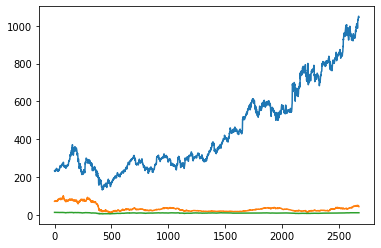

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(data_googl)
plt.plot(data_aa)
plt.plot(data_iae)

In [ ]:
DAT = np.zeros((data_googl.shape[0],3))
DAT[:,0] = data_googl
DAT[:,1] = data_aa
DAT[:,2] = data_iae          

In [ ]:
DAT.shape

(2678, 3)

In [ ]:
LAG = 5
DAT_TS = np.zeros((DAT.shape[0]-LAG,LAG,DAT.shape[1]))

for ii in range(0,DAT.shape[0]-LAG):
    DAT_TS[ii,:,:] = DAT[ii:ii+LAG,:]
    

In [ ]:
DAT_TS.shape

(2673, 5, 3)

In [ ]:
Ntr = np.floor(DAT_TS.shape[0]/2)
Y_target = 0

XX_tr = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
XX_ts = DAT_TS[range(np.int(Ntr)+1,2*np.int(Ntr)),0:LAG-1,:]

YY_tr = DAT_TS[range(0,np.int(Ntr)),LAG-1,Y_target]
YY_ts = DAT_TS[range(np.int(Ntr)+1,2*np.int(Ntr)),LAG-1,Y_target]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

In [ ]:
XX_tr.shape

(1336, 4, 3)

## MODEL 1

In [ ]:
model = Sequential()
model.add(LSTM(1, input_shape=(XX_tr.shape[1],XX_tr.shape[2]),return_sequences=True))
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 1)              20        
                                                                 
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


## MODELO 2

In [ ]:
model2 = Sequential()
model2.add(LSTM(10, input_shape=(XX_tr.shape[1],XX_tr.shape[2]), return_sequences = True))
model2.add(LSTM(10))
model2.add(Dense(1))

model2.compile(optimizer='adam',loss='mae')

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 4, 10)             560       
                                                                 
 lstm_2 (LSTM)               (None, 10)                840       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


## MODELO 3

In [ ]:
model3 = Sequential()
model3.add(LSTM(10, input_shape=(XX_tr.shape[1],XX_tr.shape[2],), return_sequences = True))
model3.add(GRU(10))
model3.add(Dense(1))

model3.compile(optimizer='adam',loss='mae')

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4, 10)             560       
                                                                 
 gru (GRU)                   (None, 10)                660       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import History 
history = History()

model3.fit(XX_tr, YY_tr, batch_size=32, epochs=50, verbose=0, callbacks=[history])

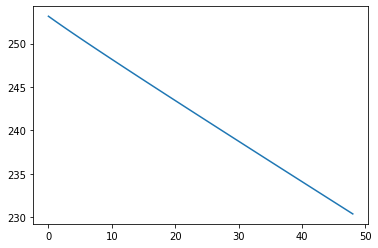

In [ ]:
loss_ev = history.history['loss']

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(loss_ev[0:-1])

In [ ]:
score = model.evaluate(XX_tr, YY_tr, verbose=0)
score

261.68341064453125

In [ ]:
y_hat = model.predict(XX_tr)
np.mean(abs(y_hat[:,0]-YY_tr))

261.6833842474365

In [ ]:
y_hat.shape

(1336, 1)

## TEST

In [ ]:
y_hat = model.predict(XX_ts)
np.mean(abs(y_hat[:,0]-YY_ts))

630.6718175327447

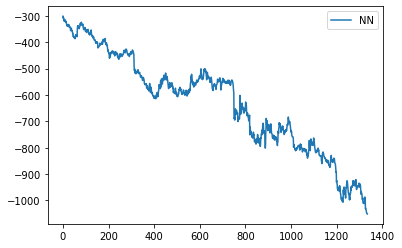

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(y_hat[:,0]-YY_ts, label='NN')
plt.legend()

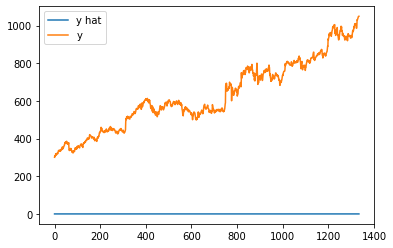

In [ ]:
plt.figure()
plt.plot(y_hat[:,0], label='y hat')
plt.plot(YY_ts, label='y')
plt.legend()

# Ejercicios

1) Comenta cada celda del código

2) Crea, entrena y prueba un modelo con capas recurrentes y convolucionales. Da el valor de mae en entrenamiento y test. 


3) Modifica la capa LSTM para que use una función de activación diferente. ¿Qué pasa con el entrenamiento?


4) Haz un modelo que use la capa Bidirectional:
https://keras.io/api/layers/recurrent_layers/bidirectional/

# Ejercicios EXTRA

5) Haz un modelos que incluya 10 activos, intenta seleccionarlos correctamente para poder predecir el valor de google.